In [18]:
from datetime import date, datetime, timedelta

import requests
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter

%matplotlib inline

sns.set_palette('muted')
sns.set_style('white')

from pprint import pprint

In [19]:
# write your solution here
def geocode_location(city, country):
    try:
        base_url = 'https://geocode.xyz/'
        api_key = '20858521380953572568x9972'
        request_url = f"{base_url}{city},+{country}?json=1&auth={api_key}"
        r = requests.get(request_url)
        result = r.json()
        latitude=float(result['latt'])
        longitude=float(result['longt'])
        return latitude, longitude
    except:
        print("There is an issue with your API")
    
geocode_location('Charlotte', 'United States of America')

(35.2006, -80.81517)

In [8]:
#def get_all_response_objects(start_year, end_year):

def get_all_response_objects(latitude, longitude, birthday):
    responses = []
    
    for year in range(1960,2024):
        request_date = date(year, birthday.month, birthday.day)
        response = get_api_response(latitude,longitude, request_date)
        responses.append(response)
    return responses

In [9]:
# helper function for 15 date range
def get_date_range(birthday):
    return {'start_date': birthday - timedelta(days=7),
           'end_date':birthday + timedelta(days=7)}

In [10]:
 def get_api_response(latitude,longitude,birthday):
    url = "https://archive-api.open-meteo.com/v1/archive"
    
    date_range = get_date_range(birthday)
    print(f"start range:{date_range['start_date']}, end_date:{date_range['end_date']}")
    
    
    params = {'latitude':latitude,
             'longitude':longitude,
             'start_date':date_range['start_date'],
             'end_date': date_range['end_date'],
             'daily':['temperature_2m_max','temperature_2m_min','apparent_temperature_max','apparent_temperature_min','precipitation_sum'],
              'timezone':'auto',
              'temperature_unit':'fahrenheit',
              'precipitation_unit':'inch'
             }
    r = requests.get(url, params=params)
    response = r.json()
    
    return response

    
    

In [11]:
birthday = datetime.strptime('10-19-1991', '%m-%d-%Y').date()
print(birthday)
api_return = get_api_response('42.50496','-83.15053',birthday)
pprint(api_return)

1991-10-19
start range:1991-10-12, end_date:1991-10-26
{'daily': {'apparent_temperature_max': [49.8,
                                        46.3,
                                        49.9,
                                        40.7,
                                        45.3,
                                        57.3,
                                        58.1,
                                        42.4,
                                        42.1,
                                        49.4,
                                        61.4,
                                        69.5,
                                        72.1,
                                        67.3,
                                        65.7],
           'apparent_temperature_min': [37.3,
                                        34.6,
                                        35.3,
                                        34.5,
                                        28.7,
                        

In [12]:
birthday = datetime.strptime('10-19-1991', '%m-%d-%Y').date()
print(birthday)
api_return_all = get_all_response_objects('42.50496','-83.15053',birthday)
pprint(api_return_all)



1991-10-19
start range:1960-10-12, end_date:1960-10-26
start range:1961-10-12, end_date:1961-10-26
start range:1962-10-12, end_date:1962-10-26
start range:1963-10-12, end_date:1963-10-26
start range:1964-10-12, end_date:1964-10-26
start range:1965-10-12, end_date:1965-10-26
start range:1966-10-12, end_date:1966-10-26
start range:1967-10-12, end_date:1967-10-26
start range:1968-10-12, end_date:1968-10-26
start range:1969-10-12, end_date:1969-10-26
start range:1970-10-12, end_date:1970-10-26
start range:1971-10-12, end_date:1971-10-26
start range:1972-10-12, end_date:1972-10-26
start range:1973-10-12, end_date:1973-10-26
start range:1974-10-12, end_date:1974-10-26
start range:1975-10-12, end_date:1975-10-26
start range:1976-10-12, end_date:1976-10-26
start range:1977-10-12, end_date:1977-10-26
start range:1978-10-12, end_date:1978-10-26
start range:1979-10-12, end_date:1979-10-26
start range:1980-10-12, end_date:1980-10-26
start range:1981-10-12, end_date:1981-10-26
start range:1982-10-1

In [13]:
def parse_json_response(responses):
    df=pd.DataFrame(responses)
    df = df.join(pd.json_normalize(df['daily'])).drop(columns=['daily'])
    df
    
#     display(df)
    
    
#     daily_average_apparent_temperature_max = []
#     for response in responses: 
#         average_apparent_temperature_max = np.mean(response['daily']['apparent_temperature_max'])
#         daily_average_apparent_temperature_max.append(average_apparent_temperature_max)
    
    measures = ["temperature_2m_max", "temperature_2m_min", "apparent_temperature_max", "apparent_temperature_min", "precipitation_sum"]
 
    #df2["temperature_2m_max_mean"] = np.mean(df2['temperature_2m_max'])
                                            
    
    
#     daily_average_apparent_temperature_max = []
#     for response in responses: 
#         average_apparent_temperature_max = np.mean(response['daily']['apparent_temperature_max'])
#         daily_average_apparent_temperature_max.append(average_apparent_temperature_max)
    
    measures = ["temperature_2m_max", "temperature_2m_min", "apparent_temperature_max", "apparent_temperature_min", "precipitation_sum"]                                               
                                               
                                               
#     df["temperature_2m_max_mean"] = np.mean(df['temperature_2m_max'])
#     print( df["temperature_2m_max_mean"])

    for col in measures:
         df[f"{col}_mean"] = df[col].apply(np.mean)
    
    #chop up time to add year column.
    df['year'] = df['time'].apply(lambda x: x[7][:4])
    
    
    df = df[['year','temperature_2m_max_mean','temperature_2m_min_mean','apparent_temperature_max_mean','apparent_temperature_min_mean','precipitation_sum_mean']]    
#     display(df)
    return df
    
    
# parse_json_response(api_return_all)

#    for col in measures:
#         df[f"{col}_mean"] = df[col].apply(np.mean)
    
    
    
    
parse_json_response(api_return_all)




,year,temperature_2m_max_mean,temperature_2m_min_mean,apparent_temperature_max_mean,apparent_temperature_min_mean,precipitation_sum_mean
0,1960,57.966667,44.220000,52.946667,38.513333,0.081333
1,1961,61.353333,47.420000,56.333333,42.093333,0.076333
2,1962,59.340000,45.100000,54.586667,39.360000,0.080333
3,1963,73.953333,53.020000,70.200000,50.546667,0.001067
4,1964,59.773333,40.486667,54.160000,34.766667,0.023667
...,...,...,...,...,...,...
59,2019,57.366667,40.726667,51.753333,34.326667,0.109933
60,2020,58.573333,41.786667,52.913333,36.166667,0.100867
61,2021,62.093333,47.593333,57.580000,43.186667,0.297600
62,2022,60.006667,42.973333,52.513333,36.180000,0.047267


In [14]:
# helper functions
def get_user_birthday():
    birthday = input('Enter your birthday (MM/DD/YYYY): ')
    return datetime.strptime(birthday, "%m/%d/%Y")

def get_user_city_of_birth():
    city = input('Enter the city you were born in: ')
    country = input('Enter the country you were born in: ')
    return city , country

In [15]:
# write your solution here
def get_data():
    birthday = get_user_birthday()
    
    # Get user's city of birth
    city, country = get_user_city_of_birth()
    
    # Get API responses for all years from 1960 to 2023
    latitude, longitude=geocode_location(city, country)
    responses=get_all_response_objects(latitude, longitude, birthday)
    final_df=parse_json_response(responses)
    
    return final_df


In [20]:
df = get_data()

df.head()

Enter your birthday (MM/DD/YYYY): 09/18/1999
Enter the city you were born in: Charlotte
Enter the country you were born in: USA
start range:1960-09-11, end_date:1960-09-25
start range:1961-09-11, end_date:1961-09-25
start range:1962-09-11, end_date:1962-09-25
start range:1963-09-11, end_date:1963-09-25
start range:1964-09-11, end_date:1964-09-25
start range:1965-09-11, end_date:1965-09-25
start range:1966-09-11, end_date:1966-09-25
start range:1967-09-11, end_date:1967-09-25
start range:1968-09-11, end_date:1968-09-25
start range:1969-09-11, end_date:1969-09-25
start range:1970-09-11, end_date:1970-09-25
start range:1971-09-11, end_date:1971-09-25
start range:1972-09-11, end_date:1972-09-25
start range:1973-09-11, end_date:1973-09-25
start range:1974-09-11, end_date:1974-09-25
start range:1975-09-11, end_date:1975-09-25
start range:1976-09-11, end_date:1976-09-25
start range:1977-09-11, end_date:1977-09-25
start range:1978-09-11, end_date:1978-09-25
start range:1979-09-11, end_date:197

,year,temperature_2m_max_mean,temperature_2m_min_mean,apparent_temperature_max_mean,apparent_temperature_min_mean,precipitation_sum_mean
0,1960,79.246667,63.040000,81.453333,63.746667,0.086133
1,1961,81.700000,62.866667,83.393333,63.800000,0.021533
2,1962,78.566667,60.780000,81.140000,61.160000,0.182400
3,1963,77.193333,58.980000,78.733333,58.373333,0.087667
4,1964,77.113333,59.513333,79.413333,58.953333,0.169267


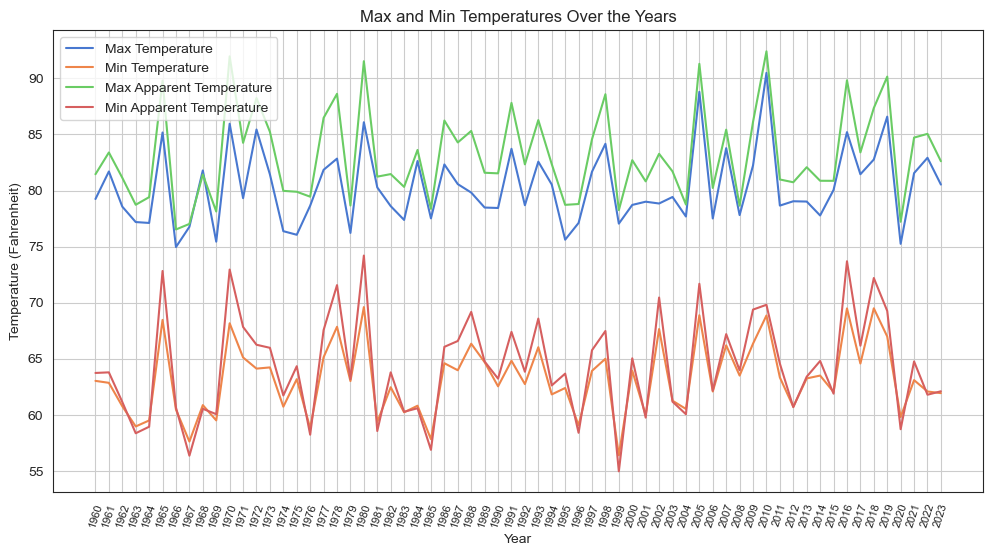

In [45]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='temperature_2m_max_mean', label='Max Temperature')
sns.lineplot(data=df, x='year', y='temperature_2m_min_mean', label='Min Temperature')
sns.lineplot(data=df, x='year', y='apparent_temperature_max_mean', label='Max Apparent Temperature')
sns.lineplot(data=df, x='year', y='apparent_temperature_min_mean', label='Min Apparent Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature (Fahrenheit)')
plt.title('Max and Min Temperatures Over the Years')
plt.legend()
plt.xticks(rotation=72)
plt.xticks(fontsize=8)
plt.grid(True)
plt.show()

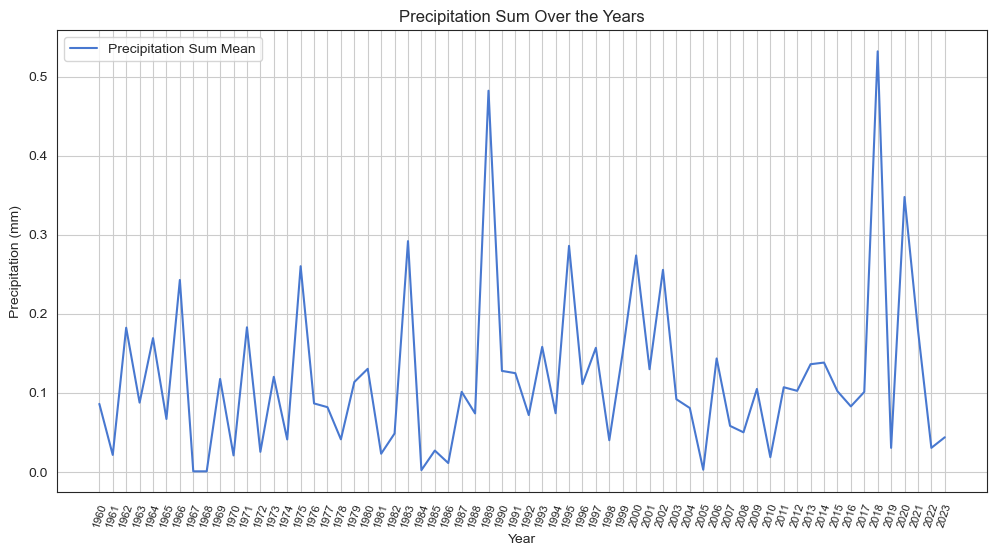

In [46]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='precipitation_sum_mean', label='Precipitation Sum Mean')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
plt.title('Precipitation Sum Over the Years')
plt.legend()
plt.xticks(rotation=72)
plt.xticks(fontsize=8)
plt.grid(True)
plt.show()

Results Summary:

The first graph, 'Min and Max Temperatures over the years', shows that the average min and max tempertures from 1960-2023 seems to follow a certain pattern where they rise and fall with about the same difference between the max and the min. The max and min apparent temperatures also seem to follow the same pattern and but they seem to be a bit higher than the max and min temperatures. 

The second graph,'Precipitation Sum over the Years', does not seem to follow the same pattern as the previous graph, potentially suggestion there is not as much correlation. However this can be dedcued with further analysis. The highest years for precipitation were 1989 and 2018. 